## Step 1: Import required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## Step 2: Load Dataset

In [2]:
df = pd.read_csv('StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Step 3: Explore the Dataset

In [3]:

print("Shape:", df.shape)


Shape: (1000, 8)


In [4]:
print(df.columns)


Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


## Step 4: Descriptive Statistics

In [7]:

print("Mean Math Score:", df['math score'].mean())
print("Median Math Score:", df['math score'].median())
print("Standard Deviation:", df['math score'].std())

Mean Math Score: 66.089
Median Math Score: 66.0
Standard Deviation: 15.163080096009468


In [8]:
df.groupby('gender')['math score'].mean()

,math score
gender,
female,63.633205
male,68.728216


## Step 5: Visualization

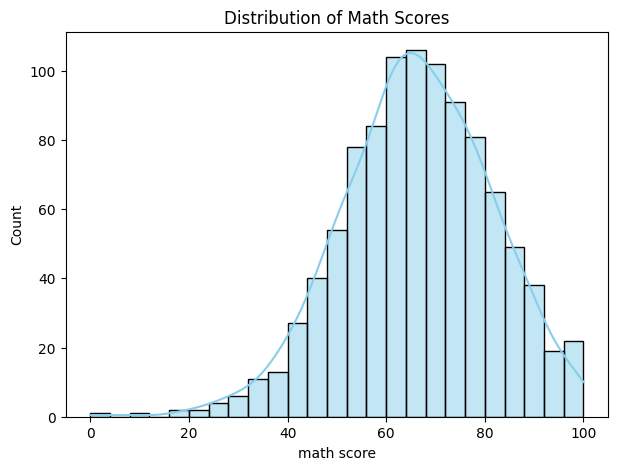

In [9]:

plt.figure(figsize=(7,5))
sns.histplot(df['math score'], kde=True, color='skyblue')
plt.title("Distribution of Math Scores")
plt.show()


/tmp/ipython-input-200565441.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='gender', y='math score', data=df, palette='Set2')


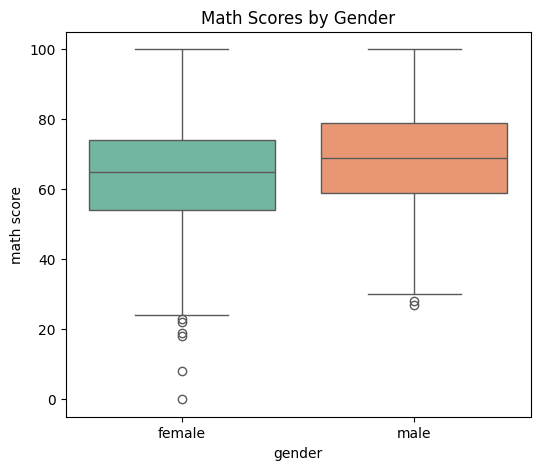

In [10]:
plt.figure(figsize=(6,5))
sns.boxplot(x='gender', y='math score', data=df, palette='Set2')
plt.title("Math Scores by Gender")
plt.show()

## Step 6: Correlation Analysis

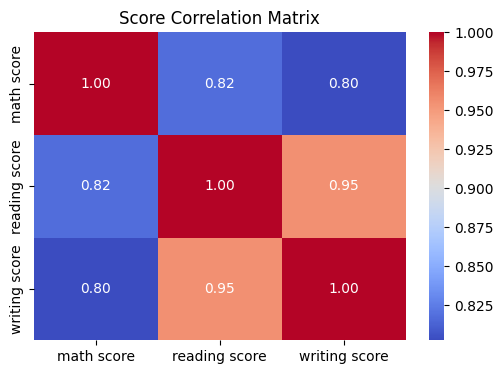

In [11]:

corr = df[['math score', 'reading score', 'writing score']].corr()
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Score Correlation Matrix")
plt.show()


## Step 7: Hypothesis Testing
### a) Gender vs Math Score (t-test)
### b) Test Preparation vs Math Score (ANOVA)
### c) Gender vs Test Preparation (Chi-square)

In [12]:
#HYPOTHESIS:
#H0 : f_mean = M_mean
#H1 : f_mean != M_mean

male = df[df['gender'] == 'male']['math score']
female = df[df['gender'] == 'female']['math score']

t_stat, p_val = stats.ttest_ind(male, female)
print("T-statistic:", round(t_stat, 3), "P-value:", round(p_val, 3))

T-statistic: 5.383 P-value: 0.0


Since p value is less than t stats hence we reject Null hypothesis

Conclusion: Gender does not affect maths scores

In [13]:
#HYPOTHESIS:
#H0 : C_mean = N_mean
#H1 : C_mean != N_mean


completed = df[df['test preparation course'] == 'completed']['math score']
none = df[df['test preparation course'] == 'none']['math score']

f_stat, p_val = stats.f_oneway(completed, none)
print("F-statistic:", round(f_stat, 3), "P-value:", round(p_val, 3))

F-statistic: 32.543 P-value: 0.0


Result : Reject null hypothesis

conclusion: Test preparation impacts the math scores

In [14]:
#HYPOTHESIS:
#H0 : There is no relationship between gender and test preparation
#H1 : There is assiciation between gender and test preparation

contingency = pd.crosstab(df['gender'], df['test preparation course'])
chi2, p, dof, expected = stats.chi2_contingency(contingency)
print("Chi2:", round(chi2, 3), "P-value:", round(p, 3))

Chi2: 0.016 P-value: 0.901


Result : Fail to reject null hypothesis since p value > chi2 score

conclusion : Gender does not effect whether the person completes test preparation or not

## Step 8: Probability Distribution & Normality Check

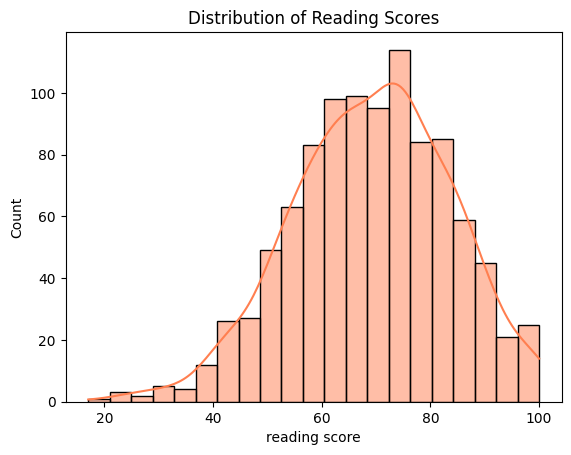

In [15]:

sns.histplot(df['reading score'], kde=True, color='coral')
plt.title("Distribution of Reading Scores")
plt.show()



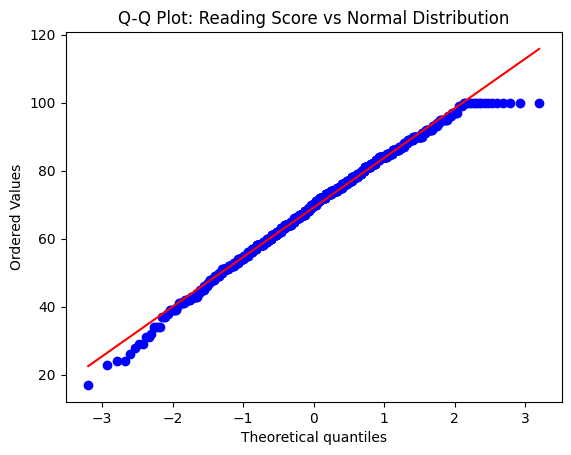

In [16]:
stats.probplot(df['reading score'], dist="norm", plot=plt)
plt.title("Q-Q Plot: Reading Score vs Normal Distribution")
plt.show()


## Step 9: Extended Statistical Analysis
Including Outlier Detection, Correlation with Parental Education, and Random Sampling.

In [17]:
# Outlier Detection (IQR Method)
Q1 = df['math score'].quantile(0.25)
Q3 = df['math score'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['math score'] < Q1 - 1.5*IQR) | (df['math score'] > Q3 + 1.5*IQR)]
print("Number of outliers in Math Score:", len(outliers))

Number of outliers in Math Score: 8


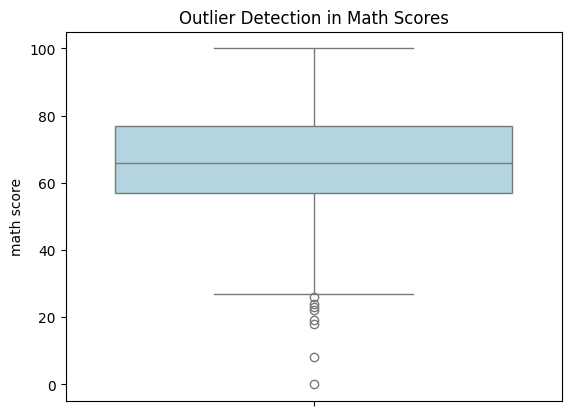

In [18]:
sns.boxplot(df['math score'], color='lightblue')
plt.title("Outlier Detection in Math Scores")
plt.show()

## Step 10: Summary of Insights


1. Math, reading, and writing scores are positively correlated.
2. Test preparation significantly improves scores.
3. Gender has a minor effect on performance.
4. Reading scores roughly follow a normal distribution.
5. Outliers in math scores may represent high achievers.
6. Parental education correlates moderately with performance.
7. Random samples yield consistent means -> stable dataset.